In [194]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [195]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [196]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [197]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [198]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

In [199]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

# Copy the crypto names from the original data
df_market_data_p2 = pd.read_csv("Resources/crypto_market_data.csv")
df_scaled_p2 = pd.DataFrame(scaled_data, columns=df_market_data_p2.drop(columns=['coin_id']).columns)
df_scaled_p2['coin_id'] = df_market_data_p2['coin_id']

# Set the coinid column as index
df_scaled_p2.set_index('coin_id', inplace=True)

# Display sample data
print(df_scaled_p2.columns)


Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


---

### Find the Best Value for k Using the Original Data.

In [200]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [201]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(df_scaled_p2)
    inertia_values.append(model.inertia_)


c:\Users\steph\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\steph\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\steph\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\steph\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

In [202]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


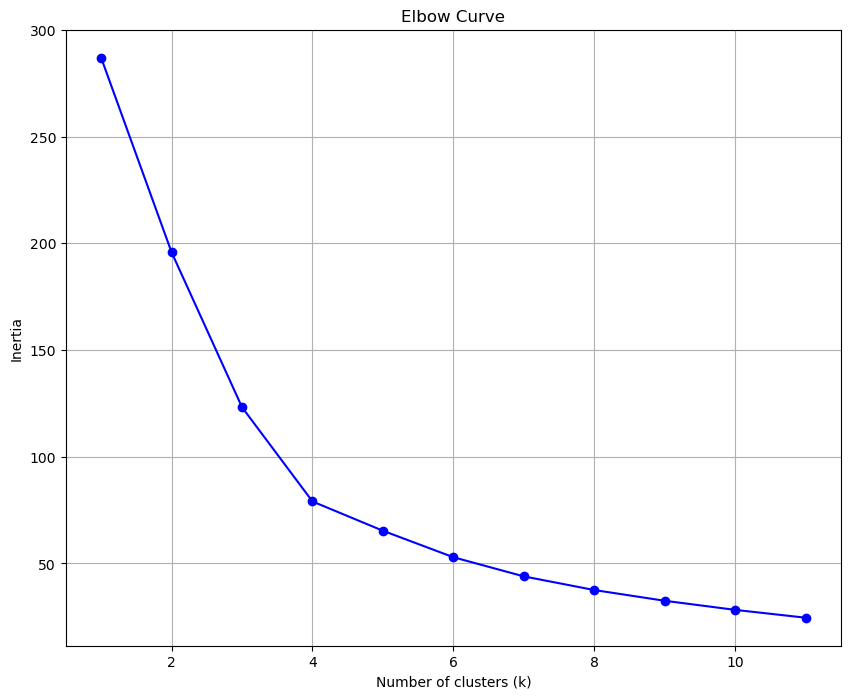

In [203]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 8))
plt.plot(elbow_data['k'], elbow_data['inertia'], 'bo-')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [204]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4)

In [205]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_scaled)

c:\Users\steph\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\steph\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [206]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans_model.predict(df_scaled)

# Print the resulting array of cluster values.
print(clusters)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 3 1 0 0 2
 0 0 0 0]


In [207]:
# Create a copy of the DataFrame
df_scaled_copy=df_scaled_p2.copy()

In [208]:
# Add a new column to the DataFrame with the predicted clusters
df_scaled_copy['cluster'] = clusters

# Display sample data
df_scaled_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


In [209]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_scaled_copy.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d', 
    hover_cols='coin_id', 
    by='cluster', 
    title='Crypto Clustering Based on Price Changes', 
    width=800, 
    height=400
)
scatter_plot


:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [210]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [211]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(df_scaled_copy)
# View the first five rows of the DataFrame. 
df_scaled_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


In [212]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.fit(df_scaled_copy)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.37938672 0.32923147 0.18455968]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total variance is 88.92% which is a decent score for being an acceptable form of variance

In [213]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(
    data=pca_data, 
    columns=['principal component 1', 'principal component 2', 'principal component 3'],)

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
crypto_names = df_market_data_p2['coin_id'].copy()

# Set the coinid column as index
df_pca = pd.concat([crypto_names, df_pca], axis=1).set_index('coin_id')

# Display sample data
df_pca.head()

,principal component 1,principal component 2,principal component 3
coin_id,,,
bitcoin,-0.138364,-1.020224,0.623382
ethereum,-0.059867,-0.623672,1.092763
tether,-0.625598,0.084966,-0.648152
ripple,-0.659851,0.122624,-0.483037
bitcoin-cash,-0.241455,-2.355599,1.918832


---

### Find the Best Value for k Using the PCA Data

In [214]:
# Create a list with the number of k-values from 1 to 11
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [215]:
# Create an empty list to store the inertia values
pca_inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    # Create a KMeans model using the current k
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the data
    kmeans_model.fit(df_pca)
    
    # Append the model's inertia to the inertia_values list
    pca_inertia_values.append(kmeans_model.inertia_)


c:\Users\steph\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\steph\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\steph\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\steph\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

In [216]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k_values, "inertia": pca_inertia_values}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

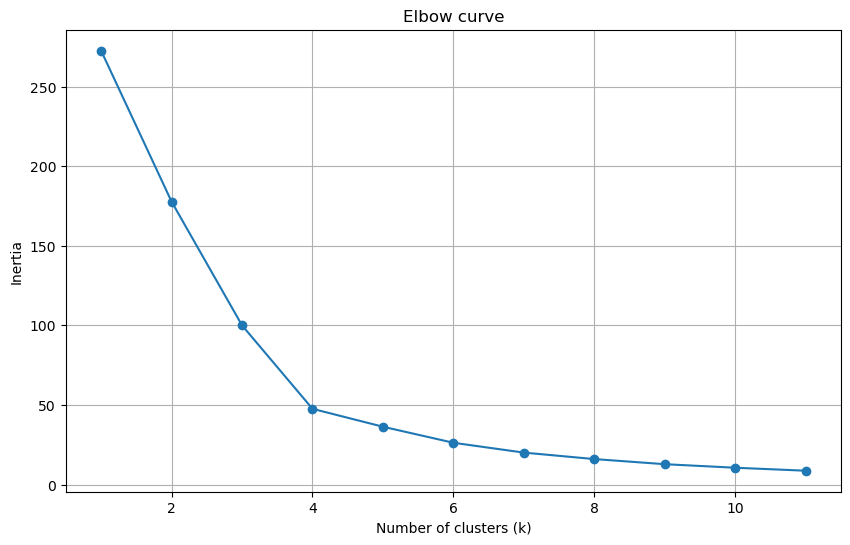

In [217]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10,6))
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o')
plt.title('Elbow curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 would be the best number to use for k in PCA data.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It does not differ from the orginal data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [218]:
# Initialize the K-Means model using the best value for k
pca_kmeans_model = KMeans(n_clusters=4,)

In [219]:
# Fit the K-Means model using the PCA data
pca_kmeans_model.fit(df_pca)

c:\Users\steph\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\steph\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [220]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_predicted_clusters = pca_kmeans_model.predict(df_pca)
# Print the resulting array of cluster values.
pca_predicted_clusters

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 2, 0, 0, 0, 0])

In [221]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['Cluster'] = pca_predicted_clusters
# Display sample data
df_pca_copy.head()

,principal component 1,principal component 2,principal component 3,Cluster
coin_id,,,,
bitcoin,-0.138364,-1.020224,0.623382,1
ethereum,-0.059867,-0.623672,1.092763,1
tether,-0.625598,0.084966,-0.648152,0
ripple,-0.659851,0.122624,-0.483037,0
bitcoin-cash,-0.241455,-2.355599,1.918832,1


In [222]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_pca_copy.hvplot.scatter(
    x="principal component 1",
    y="principal component 2",
    hover_cols="all",
    by="Cluster",
    height=500,
    width=500
)

scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [principal component 1]   (principal component 2,coin_id,principal component 3,Cluster)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

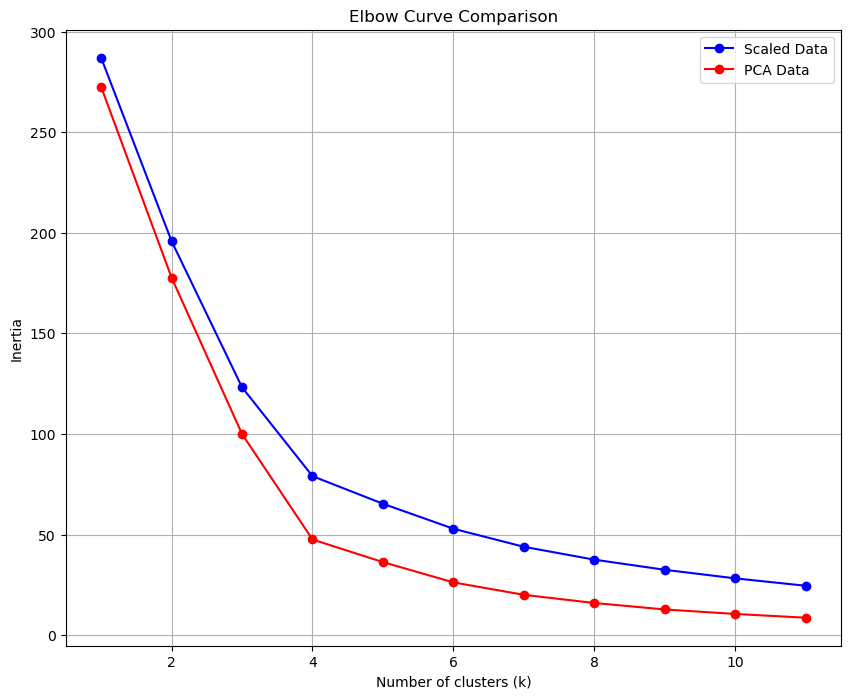

In [225]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(10, 8))

# Original data
plt.plot(elbow_data['k'], elbow_data['inertia'], 'bo-', label="Scaled Data")

# PCA-transformed data
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], 'ro-', label="PCA Data")

# Add labels and title
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve Comparison')
plt.grid(True)
plt.legend()

plt.show()

In [230]:
# Composite plot to contrast the clusters
# Scatter plot for the scaled data
scatter_plot_scaled = df_scaled_copy.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d', 
    hover_cols='coin_id', 
    by='cluster', 
    title='Crypto Clustering Based on Price Changes', 
    width=400, 
    height=400
)

# Scatter plot for the PCA data
scatter_plot_pca = df_pca_copy.hvplot.scatter(
    x="principal component 1",
    y="principal component 2",
    hover_cols="all",
    by="Cluster",
    title='Crypto Clustering Based on Principal Components', 
    width=400,
    height=400
)

# Creating a composite plot
composite_plot = scatter_plot_scaled + scatter_plot_pca
composite_plot



:Layout
   .NdOverlay.I  :NdOverlay   [cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [Cluster]
      :Scatter   [principal component 1]   (principal component 2,coin_id,principal component 3,Cluster)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** You are able to get tighter clusters.